<font color = 'purple'  size = 3>
    
# Fundamentos Prácticos de Machine Learning
    
# 04 - Modelo de Regresión Logistica

Importamos las librerías de utilidad.

In [1]:
import numpy as np
import pandas as pd 
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Cargamos un dataset de pacientes con diabetes y sin diabetes. 

In [2]:
diabetes = pd.read_csv('diabetes.csv')

In [3]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
diabetes.shape

(768, 9)

Comencemos con el modelo de regresión logística el cual nos permitirá, dadas las características de los pacientes, predecir si el paciente tiene o no diabetes.

In [5]:
# Elegimos las características dentro del dataset que utilizaremos para el modelo.
caracteristicas = ['Pregnancies', 'Insulin', 'BMI', 'Age', 'Glucose', 'BloodPressure', 'DiabetesPedigreeFunction']

# Como entrada tendremos las características del paciente.
x = diabetes[caracteristicas]

# La salida es un resultado binario, tiene diabetes (1) o no tiene diabetes (0). 
y = diabetes.Outcome

Vamos a separar el conjunto de datos en datos de entrenamiento y datos de prueba.

El conjunto de entrenamiento será el 75% de los datos mientras que el otro 25% serán datos de prueba.

Recordar que 'random_state' nos permite reproducir los resultados.

Usamos 'X' porque la entrada es una matriz mientras que la salida es un escalar 'y = 0' o 'Y = 1'.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [7]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(576, 7)
(576,)
(192, 7)
(192,)


Comenzamos con el entrenamiento.

In [8]:
# Colocamos 'max_iter = 1000', debido a que tenemos 576 datos y por defecto esta establecido como 'max_iter = 100'.
logreg = LogisticRegression(max_iter = 1000)

# Usamos 'fit' para entrenar.
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Con 'predict' podemos ver los resultados cuando introducimos las caracterísitcas de los pacientes del conjunto de prueba.

In [9]:
y_prediccion = logreg.predict(X_test)
y_prediccion

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

Los 'unos' indican que el paciente tiene diabetes mientras que los 'ceros' es que no tienen diabetes. Cabe mencionar que estos resultados son los que la maquina predijó debido a lo aprendido con el conjunto de entrenamiento. Veamos si la máquina está en lo correcto o no. Para ello consideremos la matriz de confusión.

In [10]:
# Esta es una forma muy sencilla de obtener la matriz de confusión.
matriz_conf = metrics.confusion_matrix(y_test, y_prediccion)
matriz_conf

array([[118,  12],
       [ 26,  36]], dtype=int64)

<img src='matriz.png' style="width: 350px;"/>

En una matriz de confusión:

En la diagonal tenemos:

Los verdaderos positivos (VP) son aquellos que fueron clasificados correctamente como positivos como el modelo.

Los verdaderos negativos (VN) corresponden a la cantidad de negativos que fueron clasificados correctamente como negativos por el modelo.

En la antidiagonal tenemos:

Los falsos negativos (FN) es la cantidad de positivos que fueron clasificados incorrectamente como negativos.

Los falsos positivos (FP) indican la cantidad de negativos que fueron clasificados incorrectamente como positivos.

Text(0.5, 257.44, 'Etiqueta de prediccion')

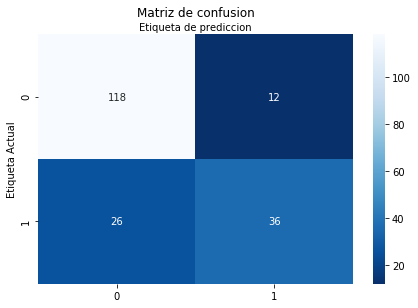

In [11]:
# Matriz de confusión con mayor detalle.
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(matriz_conf), annot = True, cmap="Blues_r", fmt="g")
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Matriz de confusion", y=1.1)
plt.ylabel("Etiqueta Actual")
plt.xlabel("Etiqueta de prediccion")

Se puede observar que la mayoría de los casos fueron clasificados correctamente (diagonal).

Una forma de ver que porcentaje de datos fueron clasificados correctamente es de la suiguiente manera:

In [12]:
exactitud = metrics.accuracy_score(y_test, y_prediccion)
print('Exactitud', exactitud)

Exactitud 0.8020833333333334


El 80% de los casos fueron clasificados correctamente!